# Plot Topography

In this notebook I am plotting the results of the Topography.C root macro.

## Description of Topography.C

This macro calculates the $\chi^2/dof$ value of the specified kinematic variable set (currently from DVCS_cross_const.csv, but can be easily changed) across all sets of parameters from the specified bounds, stepped by a specified delta value.  Specifically, it takes parameters ChunkNum (the set of kinematics), lb (lower bound of cffs), ub (upper bound of cffs), and delta (step size of cffs).  It saves these $\chi^2/dof$ values in a file called "results.txt", the first line of which specifies the parameters with which the Topography.C macro was called.  Those results can then be visualized with this notebook.

## Read Data from results.txt

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.widgets import Slider
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import os

In [2]:
res = []
with open("results12.txt") as results:
    i = 0
    for line in results:
        if i == 0:
            params = line.strip()
        else:
            res.append(float(line))
        i += 1

In [3]:
chunkNum, lb, ub, delta = map(float, params.split(", "))
chunkNum = int(chunkNum)

In [4]:
n = int((ub-lb)/delta+1)

In [5]:
cube = np.array(res).reshape(n, n, n)

Find the value of all the CFFs where the minimum occurs

In [6]:
def globalMin():
    print("ReH: " + str((np.argmin(res) // n**2)*delta + lb))
    print("ReE: " + str(((np.argmin(res) % n**2)//n)*delta + lb))
    print("ReHtilde: " + str(((np.argmin(res) % n**2) % n)*delta + lb))

In [7]:
def chi2lookup(ReH, ReE, ReHtilde):
    return cube[int((ReH-lb)/delta), int((ReE-lb)/delta), int((ReHtilde-lb)/delta)]

In [8]:
cube.min()

0.731891

In [9]:
globalMin()

ReH: 8.0
ReE: -53.0
ReHtilde: 3.0


In [10]:
chi2lookup(8, -53, 3)

0.731891

##  View slices by ReH With Slider

In order to create a visualization, the dimension of the function needs to be brought down to 3 -- accomplished by fixing the value of ReH to produce a hyperplane of the 4d space.  Set desired value of ReH below with the slider. It is initially set to the lower bound of the grid search.

<IPython.core.display.Javascript object>


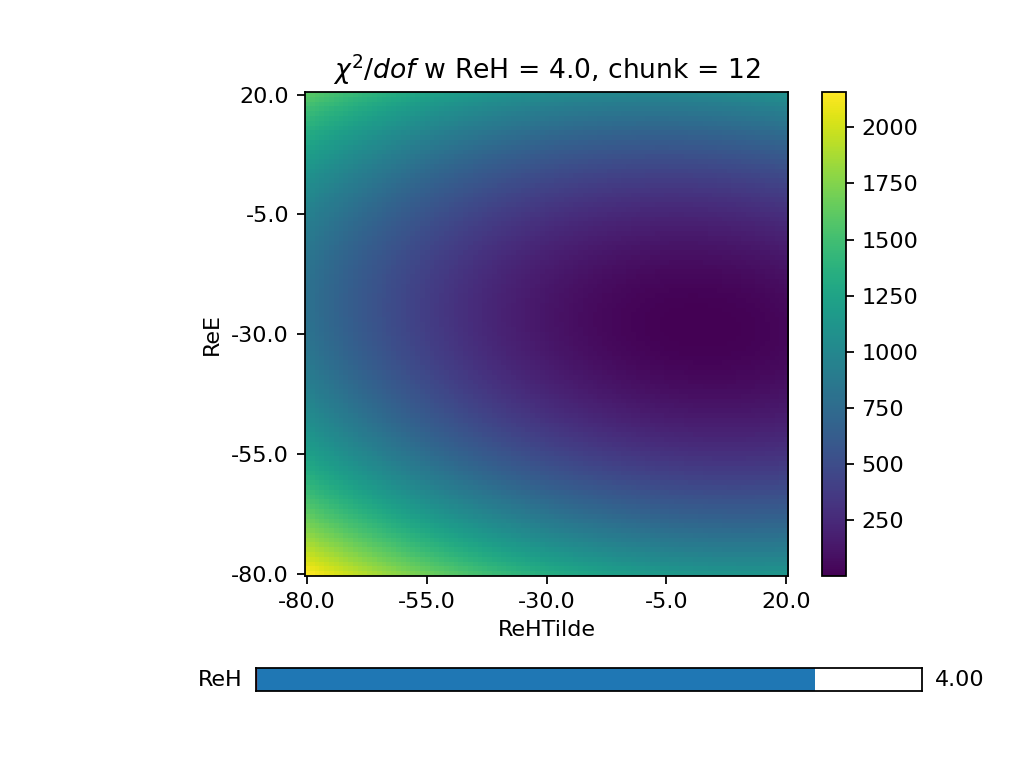

In [11]:
%matplotlib notebook

# set axis ticks
tickloc = np.arange(0, n+1, n//4)
ticklab = np.array([lb + delta*i for i in tickloc])

# generate figure
fig = plt.figure()
ax = plt.subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)

# format axes
ax.set_title('$\chi^2/dof$ w ReH = ' + str(lb) + ', chunk = ' + str(chunkNum))
ax.set_ylabel("ReE")
ax.set_xlabel("ReHTilde")
plt.xticks(tickloc, ticklab)
plt.yticks(tickloc, ticklab)


# select first image
im = cube[0]


# display image
l = ax.imshow(im, origin='lower')

# configue colorbar
cbar = plt.colorbar(l)

# set slider axes
sax = fig.add_axes([0.25, 0.1, 0.65, 0.03])


# define slider
slider = Slider(sax, 'ReH', lb, ub, valinit=lb, valstep=delta)

def update(val):
    ReH = np.round(slider.val, decimals=len(str(delta)))
    sliceNum = int((ReH - lb)/delta)
    im = cube[sliceNum]
    cbar.set_clim(vmin=im.min(),vmax=im.max())
    
    ax.set_title('$\chi^2/dof$ w ReH = ' + str(ReH) + ', chunk = ' + str(chunkNum))
    l.set_data(im)
    l.set_clim(vmin=im.min(), vmax=im.max())

    fig.canvas.draw()

slider.on_changed(update)

plt.show()